
#Assignment Set 6

by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU



In [ ]:
#@title Manual Data Injection
files = glob.glob('data/fashion-mnist/*-ubyte')

print(files)
x_test = idx2numpy.convert_from_file(files[3]).reshape(-1,784) # test images
y_test = idx2numpy.convert_from_file(files[2]) # test labels

x_ = idx2numpy.convert_from_file(files[1]).reshape(-1,784) # train images

y_ = idx2numpy.convert_from_file(files[0]) # train labels
print(y_.shape)

x_train, x_val, y_train, y_val = train_test_split(x_, y_, test_size= 0.2)

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_val = std.transform(x_val)
x_test = std.transform(x_test)

x_train = x_train.reshape(-1,28,28,1)
print(x_train.shape)

x_val = x_val.reshape(-1,28,28,1)
print(x_val.shape)

x_test = x_test.reshape(-1,28,28,1)
print(x_test.shape)

['data/fashion-mnist/train-labels-idx1-ubyte', 'data/fashion-mnist/train-images-idx3-ubyte', 'data/fashion-mnist/t10k-labels-idx1-ubyte', 'data/fashion-mnist/t10k-images-idx3-ubyte']
(60000,)
(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#@title Compare L1 and L2 Regularization
#@markdown Multi Hidden Layer CNNs No Regularization
name = 'conv_clf'

input = keras.Input(shape=(28,28,1))
x = layers.Conv2D(16,3,activation="relu")(input)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(16,3,activation="relu")(x)
output = layers.Dense(10,'relu')(layers.Flatten()(x))
nonregularized_model = keras.Model(inputs=input, outputs=output, name=name)
nonregularized_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='Adam',
            metrics=['accuracy'])

#@markdown Multi Hidden Layer CNNs L1 Regularization
name = 'conv_clf_l1'

input = keras.Input(shape=(28,28,1))
x = layers.Conv2D(16,3,activation="relu",kernel_regularizer=regularizers.l2(1e-3))(input)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32,3,activation="relu",kernel_regularizer=regularizers.l2(1e-3))(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(16,3,activation="relu",kernel_regularizer=regularizers.l2(1e-3))(x)
output = layers.Dense(10,'relu')(layers.Flatten()(x))
l2regularized_model = keras.Model(inputs=input, outputs=output, name=name)
l2regularized_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='Adam',
            metrics=['accuracy'])

#@markdown Multi Hidden Layer CNNs L2 Regularization
name = 'conv_clf_l2'

input = keras.Input(shape=(28,28,1))
x = layers.Conv2D(16,3,activation="relu",kernel_regularizer=regularizers.l1(1e-3))(input)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32,3,activation="relu",kernel_regularizer=regularizers.l1(1e-3))(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(16,3,activation="relu",kernel_regularizer=regularizers.l1(1e-3))(x)
output = layers.Dense(10,'relu')(layers.Flatten()(x))
l1regularized_model = keras.Model(inputs=input, outputs=output, name=name)
l1regularized_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='Adam',
            metrics=['accuracy'])

In [ ]:
epochs =  15#@param {type:"integer"}
verbose =  2#@param {type:"number"}

l1regularized_model.fit(x = x_train, y = y_train,
                        batch_size=64, epochs=epochs,
                        verbose=verbose,validation_data=(x_val,y_val),
                        validation_batch_size = 64)

l2regularized_model.fit(x = x_train, y = y_train,
                        batch_size=64, epochs=epochs,
                        verbose=verbose,validation_data=(x_val,y_val),
                        validation_batch_size = 64)

nonregularized_model.fit(x = x_train, y = y_train,
                        batch_size=64, epochs=epochs,
                        verbose=verbose,validation_data=(x_val,y_val),
                        validation_batch_size = 64)

Epoch 1/15
750/750 - 2s - loss: 1.3613 - accuracy: 0.6565 - val_loss: 0.9875 - val_accuracy: 0.7129
Epoch 2/15
750/750 - 2s - loss: 0.9170 - accuracy: 0.7322 - val_loss: 0.8517 - val_accuracy: 0.7483
Epoch 3/15
750/750 - 2s - loss: 0.8352 - accuracy: 0.7486 - val_loss: 0.8214 - val_accuracy: 0.7470
Epoch 4/15
750/750 - 2s - loss: 0.7914 - accuracy: 0.7580 - val_loss: 0.7711 - val_accuracy: 0.7596
Epoch 5/15
750/750 - 2s - loss: 0.7583 - accuracy: 0.7654 - val_loss: 0.7620 - val_accuracy: 0.7613
Epoch 6/15
750/750 - 2s - loss: 0.7408 - accuracy: 0.7665 - val_loss: 0.7462 - val_accuracy: 0.7593
Epoch 7/15
750/750 - 2s - loss: 0.7278 - accuracy: 0.7685 - val_loss: 0.7186 - val_accuracy: 0.7692
Epoch 8/15
750/750 - 2s - loss: 0.7180 - accuracy: 0.7720 - val_loss: 0.7171 - val_accuracy: 0.7716
Epoch 9/15
750/750 - 2s - loss: 0.7112 - accuracy: 0.7732 - val_loss: 0.7225 - val_accuracy: 0.7689
Epoch 10/15
750/750 - 2s - loss: 0.7041 - accuracy: 0.7751 - val_loss: 0.7046 - val_accuracy: 0.7717

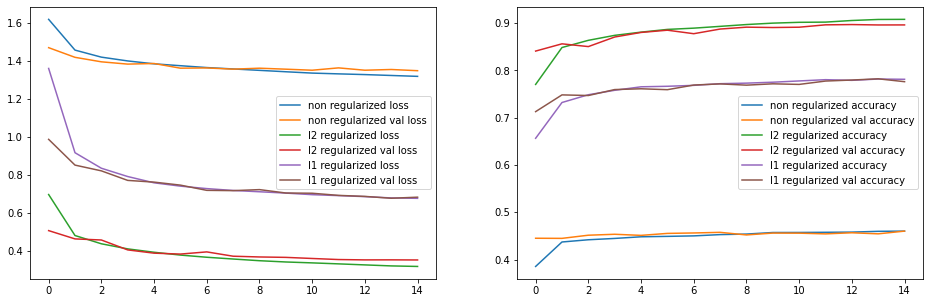

In [ ]:
#@title Plotting Training History
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(nonregularized_model.history.history['loss'],label = 'non regularized loss')
plt.plot(nonregularized_model.history.history['val_loss'],label = 'non regularized val loss')
plt.plot(l2regularized_model.history.history['loss'],label = 'l2 regularized loss')
plt.plot(l2regularized_model.history.history['val_loss'],label = 'l2 regularized val loss')
plt.plot(l1regularized_model.history.history['loss'],label = 'l1 regularized loss')
plt.plot(l1regularized_model.history.history['val_loss'],label = 'l1 regularized val loss')
plt.legend()

plt.subplot(122)
plt.plot(nonregularized_model.history.history['accuracy'],label = 'non regularized accuracy')
plt.plot(nonregularized_model.history.history['val_accuracy'],label = 'non regularized val accuracy')
plt.plot(l2regularized_model.history.history['accuracy'],label = 'l2 regularized accuracy')
plt.plot(l2regularized_model.history.history['val_accuracy'],label = 'l2 regularized val accuracy')
plt.plot(l1regularized_model.history.history['accuracy'],label = 'l1 regularized accuracy')
plt.plot(l1regularized_model.history.history['val_accuracy'],label = 'l1 regularized val accuracy')
plt.legend()

In [ ]:
#@title Evaluation of The L2 Regularized Model and L1 Regularized Model
print(nonregularized_model.evaluate(x_test, y_test))
print(l1regularized_model.evaluate(x_test, y_test))
print(l2regularized_model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 1.3897 - accuracy: 0.4494
[1.3896524906158447, 0.44940000772476196]
313/313 [==============================] - 1s 2ms/step - loss: 0.7074 - accuracy: 0.7714
[0.7074381113052368, 0.771399974822998]
313/313 [==============================] - 1s 2ms/step - loss: 0.3762 - accuracy: 0.8900
[0.3762166500091553, 0.8899999856948853]
